In [ ]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

In [2]:
# Import required libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# For data splitting and metrics
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

# Linear Regression Model
from sklearn.linear_model import LinearRegression

# Deep Neural Network (using Keras)
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.callbacks import EarlyStopping

# Suppress warnings for cleaner output
import warnings
warnings.filterwarnings("ignore")

In [4]:
from sklearn.datasets import fetch_openml
boston = fetch_openml(name='boston', version=1, as_frame=True)
data = boston.frame
data.rename(columns={'MEDV': 'PRICE'}, inplace=True) 

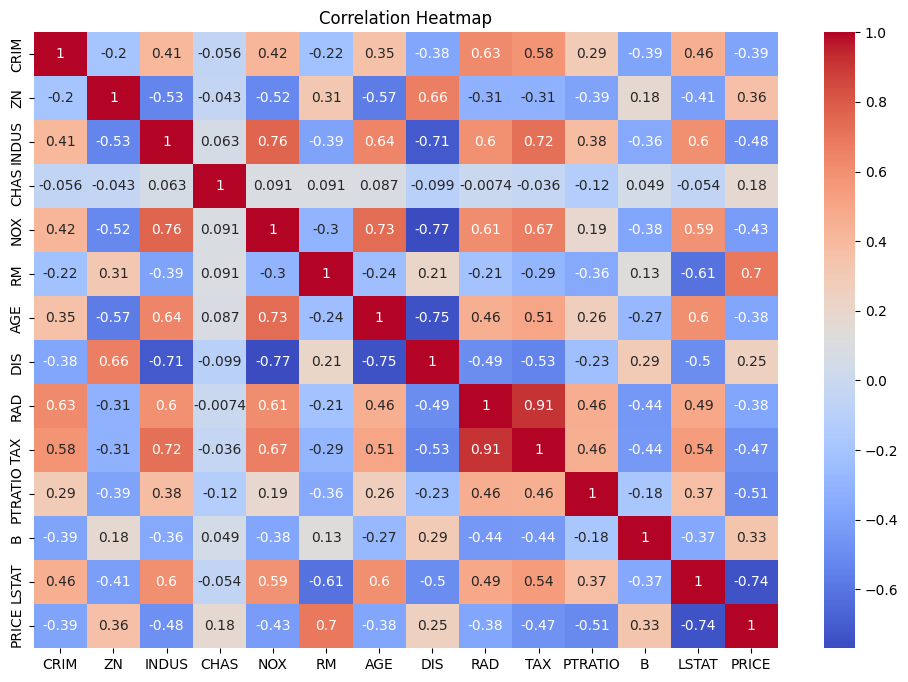

In [8]:
plt.figure(figsize=(12, 8))
corr_matrix = data.corr()
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.title("Correlation Heatmap")
plt.show()

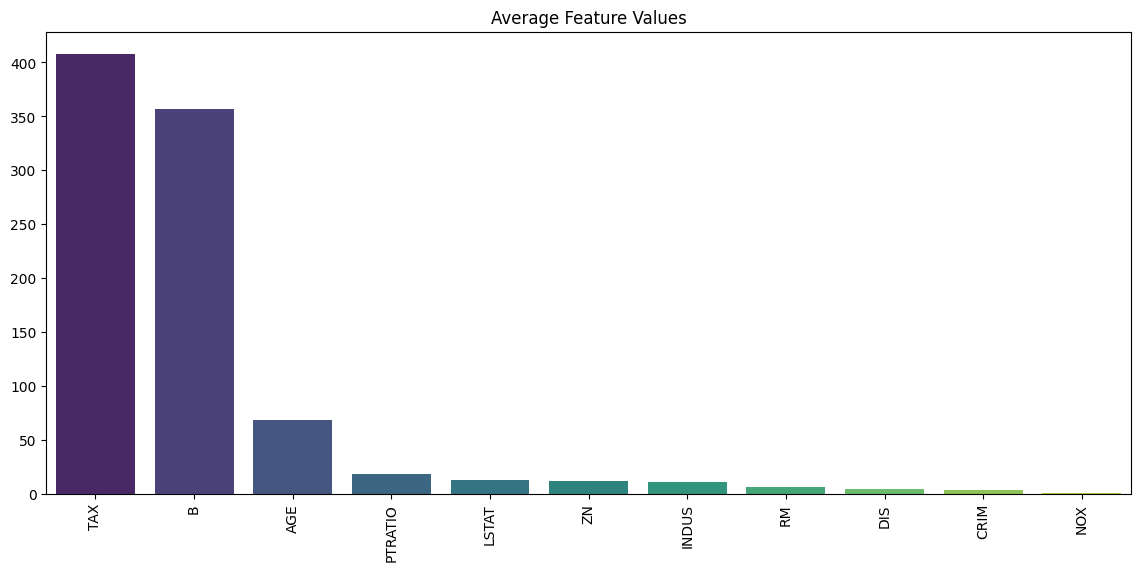

In [10]:
plt.figure(figsize=(14, 6))
# Calculate mean only for numeric columns
avg_values = data.drop('PRICE', axis=1).mean(numeric_only=True).sort_values(ascending=False)
sns.barplot(x=avg_values.index, y=avg_values.values, palette="viridis")
plt.xticks(rotation=90)
plt.title("Average Feature Values")
plt.show()


In [11]:
print("\nNull values in each column:")
print(data.isnull().sum())


Null values in each column:
CRIM       0
ZN         0
INDUS      0
CHAS       0
NOX        0
RM         0
AGE        0
DIS        0
RAD        0
TAX        0
PTRATIO    0
B          0
LSTAT      0
PRICE      0
dtype: int64


In [12]:
X = data.drop('PRICE', axis=1)
y = data['PRICE']

In [13]:
# Train-test split (80-20 split)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [15]:
# Standardize the features (mean=0, std=1)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [16]:
# Train the Linear Regression Model
lin_reg = LinearRegression()
lin_reg.fit(X_train_scaled, y_train)


LinearRegression()

In [17]:
# Predictions
y_pred_lin = lin_reg.predict(X_test_scaled)

In [18]:
# Evaluation Metrics for Linear Regression
mse_lin = mean_squared_error(y_test, y_pred_lin)
mae_lin = mean_absolute_error(y_test, y_pred_lin)
r2_lin  = r2_score(y_test, y_pred_lin)


In [19]:
print("\nLinear Regression Performance:")
print(f"Mean Squared Error (MSE): {mse_lin:.3f}")
print(f"Mean Absolute Error (MAE): {mae_lin:.3f}")
print(f"R2 Score: {r2_lin:.3f}")


Linear Regression Performance:
Mean Squared Error (MSE): 24.291
Mean Absolute Error (MAE): 3.189
R2 Score: 0.669


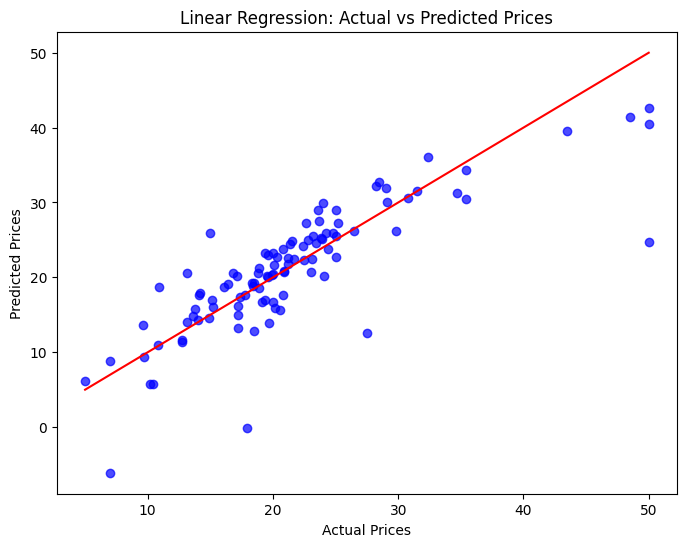

In [20]:
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred_lin, alpha=0.7, color='blue')
plt.xlabel("Actual Prices")
plt.ylabel("Predicted Prices")
plt.title("Linear Regression: Actual vs Predicted Prices")
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red')  # Diagonal line
plt.show()


In [21]:
# Build the DNN model
model = Sequential([
    Dense(64, input_dim=X_train_scaled.shape[1], activation='relu'),
    Dense(32, activation='relu'),
    Dense(16, activation='relu'),
    Dense(1)  # Output layer for regression
])

In [22]:
model.compile(optimizer='adam', loss='mse', metrics=['mae'])

In [23]:
# Callback to stop early if validation loss doesn't improve
early_stop = EarlyStopping(monitor='val_loss', patience=20, restore_best_weights=True)


In [24]:
# Train the model
history = model.fit(X_train_scaled, y_train, 
                    validation_split=0.2, 
                    epochs=200, 
                    batch_size=16, 
                    callbacks=[early_stop],
                    verbose=0)

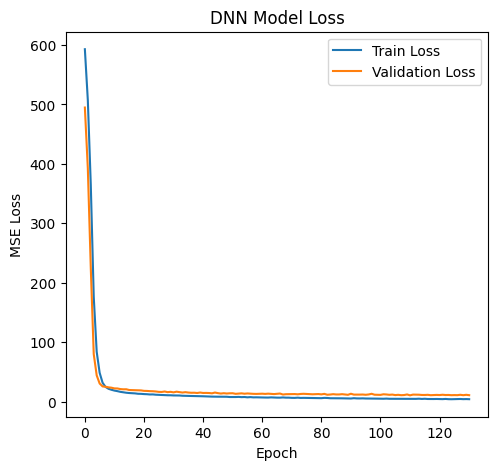

In [25]:
# Plot training history
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title("DNN Model Loss")
plt.xlabel("Epoch")
plt.ylabel("MSE Loss")
plt.legend()

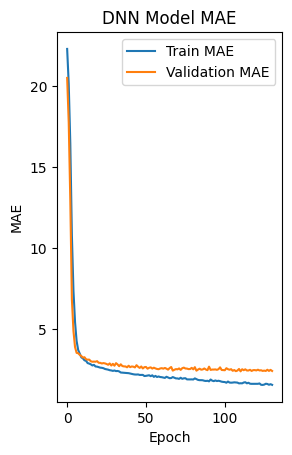

In [26]:
plt.subplot(1, 2, 2)
plt.plot(history.history['mae'], label='Train MAE')
plt.plot(history.history['val_mae'], label='Validation MAE')
plt.title("DNN Model MAE")
plt.xlabel("Epoch")
plt.ylabel("MAE")
plt.legend()
plt.show()

In [27]:
# Predictions with DNN
y_pred_dnn = model.predict(X_test_scaled).flatten()


4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step


In [29]:
# Evaluation Metrics for DNN
mse_dnn = mean_squared_error(y_test, y_pred_dnn)
mae_dnn = mean_absolute_error(y_test, y_pred_dnn)
r2_dnn  = r2_score(y_test, y_pred_dnn)
print("\nDeep Neural Network Performance:")
print(f"Mean Squared Error (MSE): {mse_dnn:.3f}")
print(f"Mean Absolute Error (MAE): {mae_dnn:.3f}")
print(f"R2 Score: {r2_dnn:.3f}")



Deep Neural Network Performance:
Mean Squared Error (MSE): 12.120
Mean Absolute Error (MAE): 2.246
R2 Score: 0.835


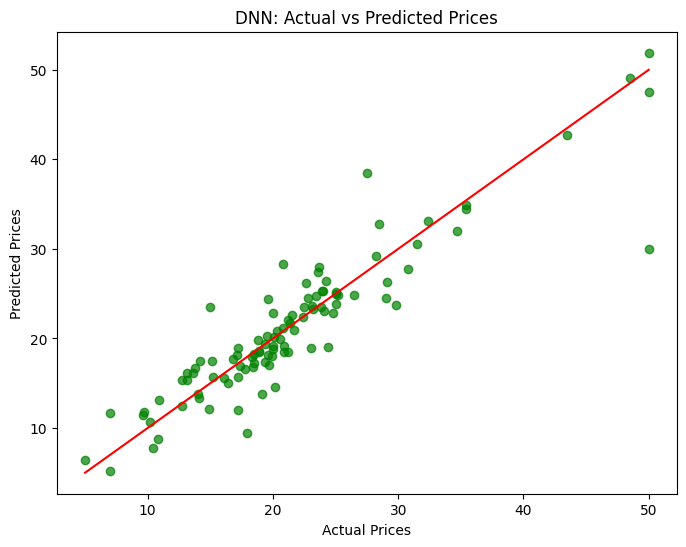

In [30]:
# Visualize Actual vs Predicted for DNN
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred_dnn, alpha=0.7, color='green')
plt.xlabel("Actual Prices")
plt.ylabel("Predicted Prices")
plt.title("DNN: Actual vs Predicted Prices")
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red')  # Diagonal line
plt.show()

In [31]:
print("\n=== Comparison Summary ===")
print(f"Linear Regression -> MSE: {mse_lin:.3f}, MAE: {mae_lin:.3f}, R2: {r2_lin:.3f}")
print(f"Deep Neural Network -> MSE: {mse_dnn:.3f}, MAE: {mae_dnn:.3f}, R2: {r2_dnn:.3f}")


=== Comparison Summary ===
Linear Regression -> MSE: 24.291, MAE: 3.189, R2: 0.669
Deep Neural Network -> MSE: 12.120, MAE: 2.246, R2: 0.835
